In [1]:
import numpy as np                 
import pandas as pd                
import matplotlib.pyplot as plt   
from scipy.signal import savgol_filter as sg
from scipy.signal import medfilt  
from scipy.spatial.distance import pdist,squareform
import scipy.cluster.hierarchy as sch
from numpy.linalg import pinv
import seaborn as sns

In [2]:
def svdpcaf2(A,nlv):
    '''
    calculate the scores and loading vectors of a set of data
    usage:  s,L = svdpcaf(A,nlv)
    where A = the matrix of data A.shape = (nspec,npts)
    nlv = the number of loading vectors (integer)
    s = scores matrix s.shape = (nspec,nlv)
    L = is the loading vector matrix L.shape = (nlv, npts)
    requires 
    '''
    import numpy as np
    from numpy.linalg import svd
    U,SG, Vt = svd(A,full_matrices=True)
    S =  -1*(U@np.diag(SG))
    L = -1*Vt

    nspec,npts = A.shape
    F = (SG**2) / (nspec-1)
    #eig_val = sigma**2 / (A_.shape[0]-1)
    F = F / F.sum()

    return S[:,:nlv], L[:nlv,:],F

In [3]:
Akn = np.genfromtxt("./csv_data2/known_spectra.csv",delimiter=",")
xorg = np.genfromtxt("./csv_data2/x_axis.csv",delimiter=",")
Au = np.genfromtxt("./csv_data2/unknown_spectra.csv",delimiter=",")
label_pd = pd.read_csv("./csv_data2/labels.csv", header=None)
labels = label_pd.iloc[:, 0].values


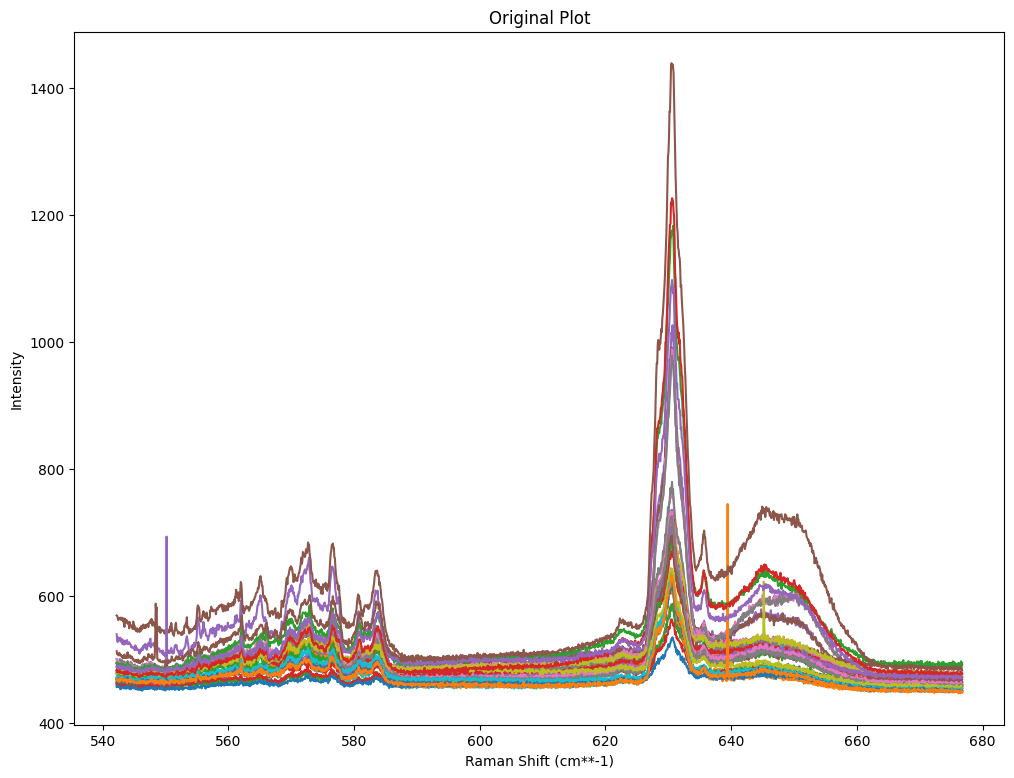

In [4]:
## rawdata
plt.figure(figsize=(12,9))
plt.plot(xorg,Akn)
# plt.invert_xaxis()
plt.xlabel('Raman Shift (cm**-1)')
plt.ylabel('Intensity')
plt.title('Original Plot')
plt.show()


In [5]:
rng = [627, 635]
# rng = [620, 640]
start_idx = np.searchsorted(xorg, rng[0], side='left')
end_idx = np.searchsorted(xorg, rng[1], side='right') 
xc = xorg[start_idx:end_idx]
Ac = Akn[start_idx:end_idx, :]
Auc = Au[start_idx:end_idx, :]


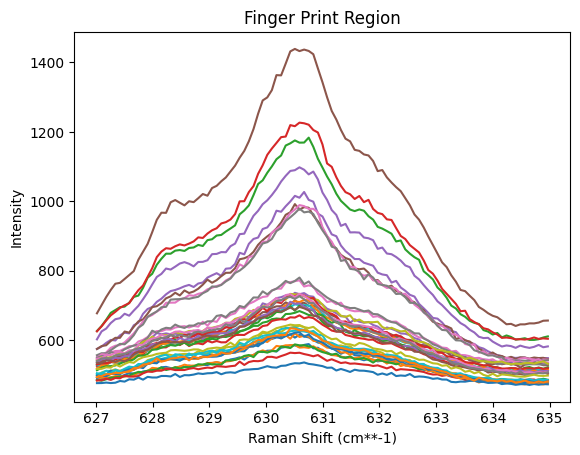

In [6]:
## cropped data
plt.plot(xc,Ac)
# plt.invert_xaxis()
plt.xlabel('Raman Shift (cm**-1)')
plt.ylabel('Intensity')
plt.title('Finger Print Region')
plt.show()

In [7]:
## 2nd derivative (baseline de-emphasizing)
windowsize = 10      ## smoothing function size
porder = 3                        ##polynomial order must be larger than derivative
dorder = 2                    ## derivative order 0 = smooth, 1 = 1st derivative, 2 = 2nd derivative
Ad = sg(Ac,windowsize,polyorder=porder,deriv=dorder)     ## sg known data
Aud = sg(Auc.T,windowsize,polyorder=porder,deriv=dorder)   ## sg unknown data same way

## pair-wise Euclidean distance on known spectra,look for sets of spectra that are close in ED distance,
## these will be possible similar data
met = 'euclidean'
ed =squareform( pdist(Ad.T,metric=met) )

## calculate the linkages from the distances
Y = sch.linkage(Ad, method='average',metric=met)

## PCA of known data
# nspec, npts = Ad.shape
#calculate the scores
# nlv = 6
# s,L,F = svdpcaf2(Ad,nlv)
# s = np.array(s)

## use the loading vectors for the known data to generate scores for the unknown data
# Aud = np.matrix(Aud)  ## convert array to matrix
# su = np.array(Aud*pinv(L))  ## convert to array for plotting purposes


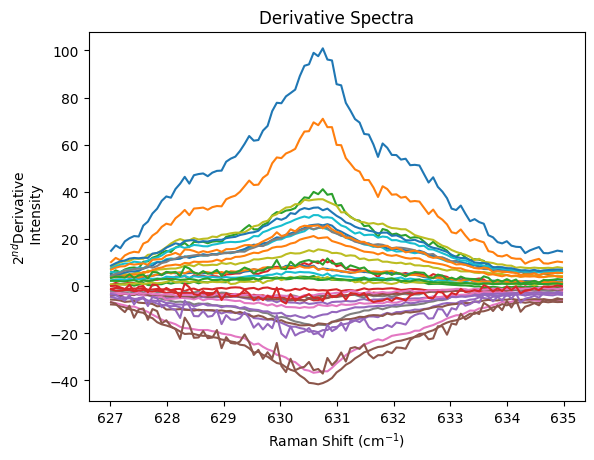

In [8]:
## derivative spectra
plt.plot(xc,Ad)
# plt.invert_xaxis()
plt.xlabel('Raman Shift (cm$^{-1}$)')
plt.ylabel('2$^{nd}$Derivative \n Intensity')
plt.title('Derivative Spectra')
plt.show()

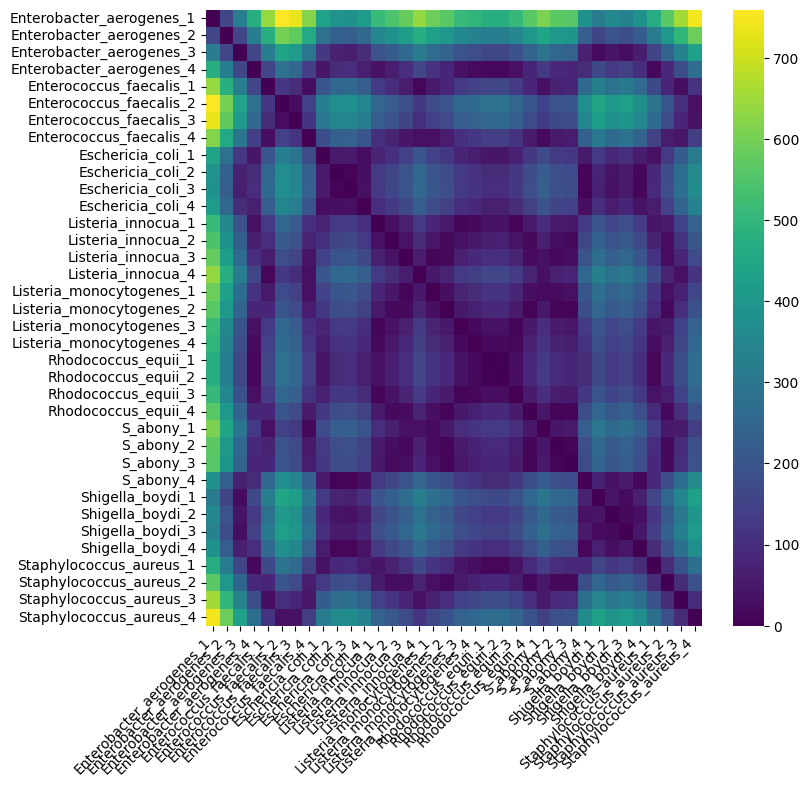

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap(ed, xticklabels=labels, yticklabels=labels, cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
## HCA
Z = sch.dendrogram(Y.T,color_threshold=4.5, show_leaf_counts=False)


ValueError: Linkage matrix 'Z' must have 4 columns.